In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load dataset
df = pd.read_csv("Netflix.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
# Check missing values
print(df.isnull().sum())

# Fill missing values
#df['country'].fillna('Unknown', inplace=True)
#df['rating'].fillna('Unknown', inplace=True)
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')


# Convert date_added to datetime
#df['date_added'] = pd.to_datetime(df['date_added'])
#df['year_added'] = df['date_added'].dt.year
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors="coerce")



show_id          0
type             0
title            0
director        63
cast            20
country         64
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64


/tmp/ipython-input-275723426.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




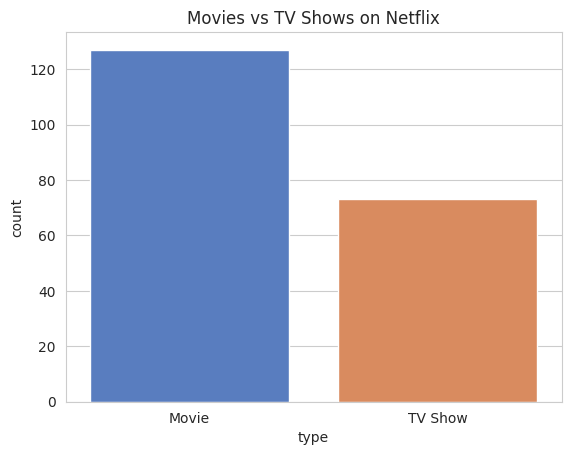

In [12]:
sns.countplot(data=df, x='type', palette="muted")
plt.title("Movies vs TV Shows on Netflix")
plt.show()


/tmp/ipython-input-3339229166.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




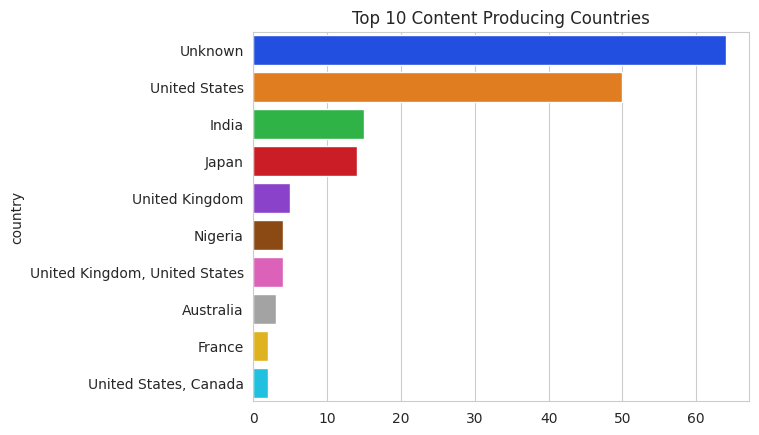

In [13]:
top_countries = df['country'].value_counts().head(10)
sns.set_style("whitegrid")
sns.barplot(x=top_countries.values, y=top_countries.index, palette="bright")
plt.title("Top 10 Content Producing Countries")
plt.show()


/tmp/ipython-input-3520496832.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




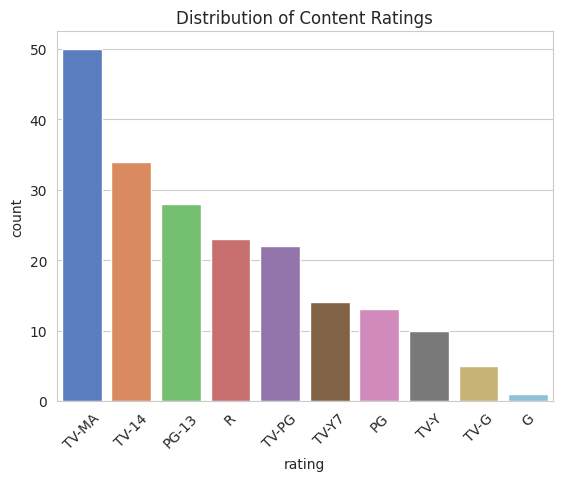

In [14]:
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette="muted")
plt.xticks(rotation=45)
plt.title("Distribution of Content Ratings")
plt.show()



/tmp/ipython-input-1656470798.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




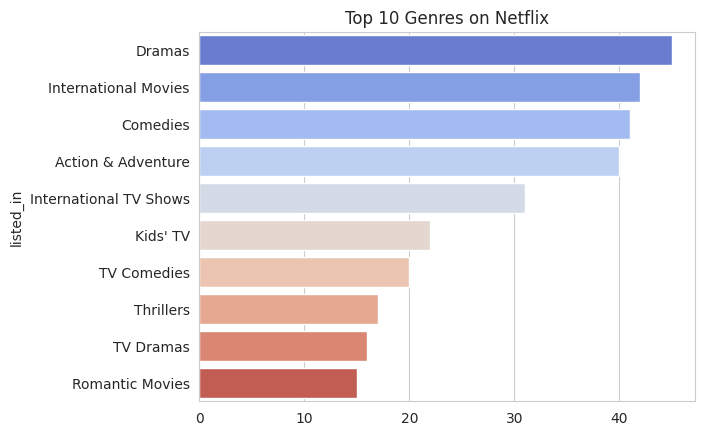

In [15]:
genres = df['listed_in'].str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(10)

sns.barplot(x=top_genres.values, y=top_genres.index, palette="coolwarm")
plt.title("Top 10 Genres on Netflix")
plt.show()


/tmp/ipython-input-1406129748.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




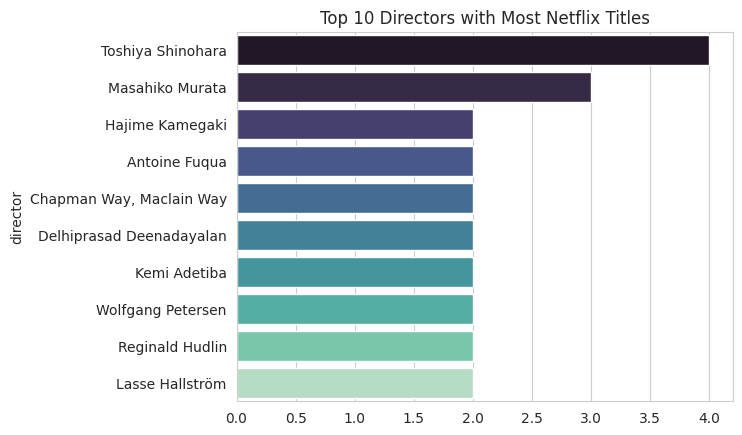

In [16]:
top_directors = df['director'].value_counts().head(10)

sns.barplot(x=top_directors.values, y=top_directors.index, palette="mako")
plt.title("Top 10 Directors with Most Netflix Titles")
plt.show()


/tmp/ipython-input-2227078489.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




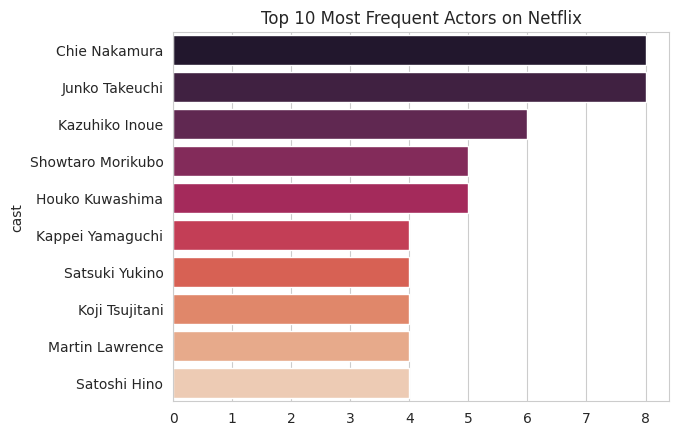

In [17]:
# Exploding 'cast' column
actors = df['cast'].dropna().str.split(',').explode().str.strip()
top_actors = actors.value_counts().head(10)

sns.barplot(x=top_actors.values, y=top_actors.index, palette="rocket")
plt.title("Top 10 Most Frequent Actors on Netflix")
plt.show()


In [18]:
country_data = df['country'].value_counts().reset_index()
country_data.columns = ['country', 'count']

fig = px.choropleth(country_data,
                    locations="country",
                    locationmode="country names",
                    color="count",
                    title="Netflix Content by Country",
                    color_continuous_scale="reds")
fig.show()